In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [6]:
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier

In [8]:
# Load the Iris dataset
iris = load_iris()

data = iris.data
columns = iris.feature_names

df = pd.DataFrame(data, columns=columns)
df.to_csv("datasets/iris_dataset.csv", index=False)
print("Đã tạo file iris_dataset.csv thành công!")

Đã tạo file iris_dataset.csv thành công!


In [9]:
# Read and prepare the dataset
df = pd.read_csv(
    "datasets/iris_dataset.csv",
    header=0,
    na_values="NA",
    comment="\t",
    sep=",",
    skipinitialspace=True,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X = iris.data
Y = iris.target

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Import the Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a classifier object
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
# Test trained model with test set
Y_pred = clf.predict(X_test)

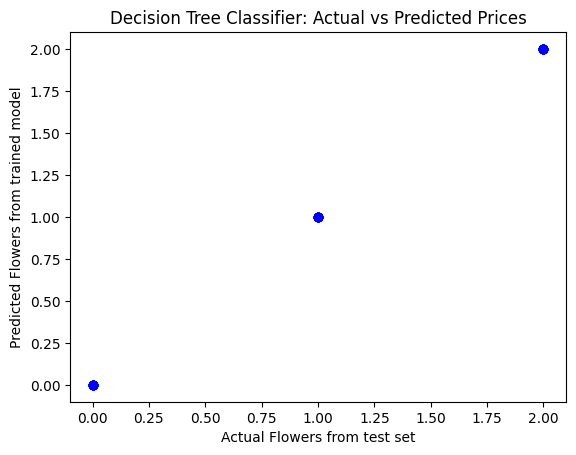

In [15]:
# Scatter plot for original data
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel("Actual Flowers from test set")
plt.ylabel("Predicted Flowers from trained model")
plt.title("Decision Tree Classifier: Actual vs Predicted Prices")
plt.show()

In [16]:
# Print accuracy on the test set
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 1.0


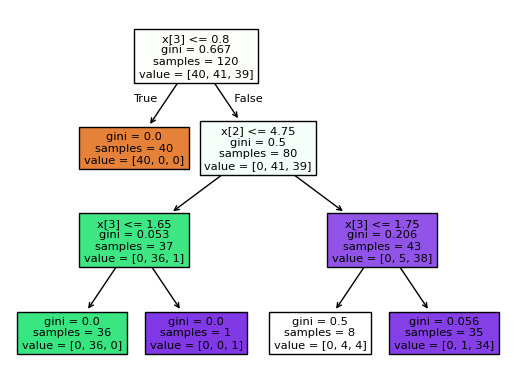

In [17]:
plot_tree(clf, filled=True)
plt.savefig("decision_tree_classifier.pdf")
plt.show()

In [18]:
feat_importances = clf.feature_importances_
print("Feature importances = " + str(feat_importances))

Feature importances = [0.         0.         0.39426873 0.60573127]


<Axes: >

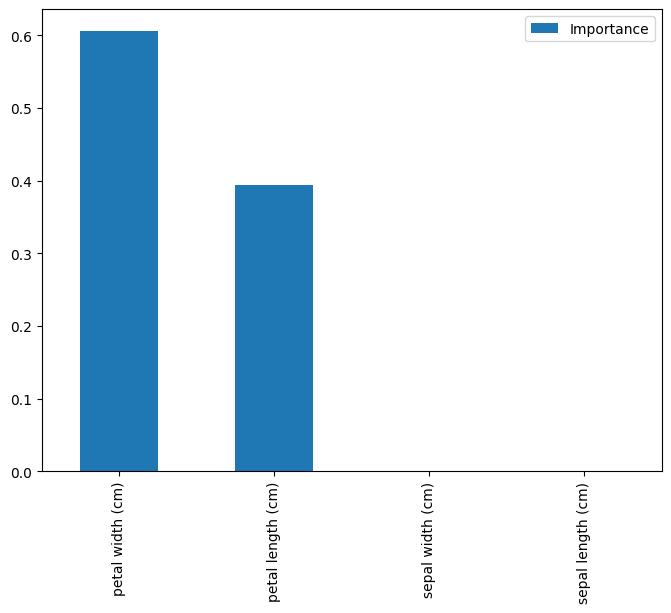

In [19]:
feat_importances = pd.DataFrame(clf.feature_importances_, index=columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [20]:
from sklearn.tree import DecisionTreeClassifier

train_err = []
test_err = []
for k, depth in enumerate(range(1,10)):
    clf = DecisionTreeClassifier(max_depth = depth, random_state=0)
    clf.fit(X_train, Y_train)

    # Compute prices Y_pred from training set X_train
    Y_pred_train = clf.predict(X_train)

    # Compute prices Y_pred from test set X_test
    Y_pred_test = clf.predict(X_test)

    train_err.append(accuracy_score(Y_train, Y_pred_train))
    test_err.append(accuracy_score(Y_test, Y_pred_test))

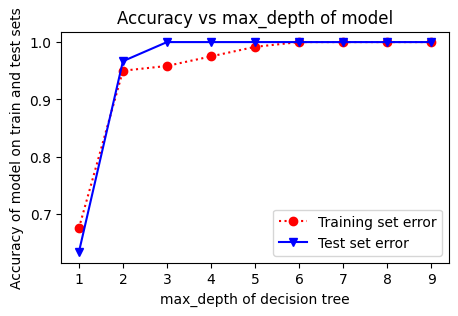

In [21]:
x = np.linspace(1,9,9)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x, train_err, "o:r", label="Training set error")
ax.plot(x, test_err, "v-b", label="Test set error")
ax.set_xlabel("max_depth of decision tree")
ax.set_ylabel("Accuracy of model on train and test sets")
ax.set_title("Accuracy vs max_depth of model")
ax.legend()
plt.show()